# DSP Project: Sampling and Down-Sampling

**Submitted by:</br>
Devansh</br>
En no.: 20/11/EE/013</br>
V Semester</br>
School of Engineering, JNU</br>**

This project deals with **Sampling** and **Down-sampling** of signals.

We first try out the principles of sampling and down-sampling on a normal *sine wave* and then move on to applying those on a real audio signal.

**NOTE:**
 This notebook has several sliders to control the various parameters. After changing each parameter do press the `play` (triangular) button on the top left corner of the slider cell to run the changes through each of the following cells for the change to affect the later code.

## Importing the required libraries

In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

print("Imports Completed")

Imports Completed


# Generating The Signal
Here we'll be generating a **sine wave** and then sample & store it as a `wave` file. This will enable us to play the stored signal as an audio signal to see the differences made by changing each parameters.
- Use the `frequency` slider to select the frequency of original sine wave. (Max 8 kHz)
- Use the 'Sampling_Frequency` slider to select the frequency at which to sample the signal. (Max 48 kHz)

In [2]:
frequency = 500

In [3]:
f_sampling = 4000

In [4]:
# Taking number of samples for one second
num_samples = f_sampling
amplitude = 16000 # For half scale audio

sine_wave = [amplitude* np.sin(2 * np.pi * frequency * x/f_sampling) for x in range(num_samples)]   #Generate the sampled signal
ts = np.arange(len(sine_wave))

## Storing the generated signal
Here we store the generated signal as `sine.wav`. This file cane be played as an audio file.

In [5]:
file = "sine.wav"
wav_file=wave.open(file, 'w')   #Create and open a file named sine.wav
wav_file.setparams((1, 2, f_sampling, num_samples, "NONE", "no compressed"))

In [6]:
for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s))) # Writing the sine wave, sample by sample, as a 16-bit audio

## Checking the stored file

In [7]:
frame_rate = f_sampling
infile = "sine.wav"
num_samples = f_sampling

wav_file = wave.open(infile, 'r')   # Open the file in read mode

data = wav_file.readframes(num_samples) # Extract the data

wav_file.close()

data = struct.unpack('{n}h'.format(n=num_samples), data)    # Unpacking the data

## Plotting the stored signal

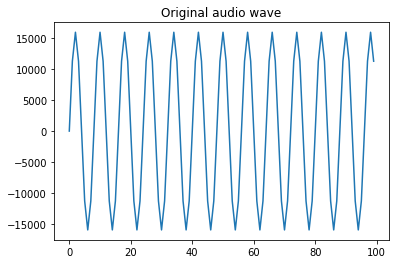

In [8]:
plt.subplot(1,1,1)

plt.plot(data[:100])

plt.title("Original audio wave")

plt.show()

# Spectral Analysis Of Sine.wav

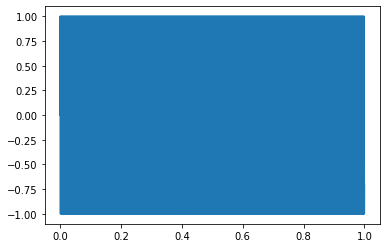

In [9]:
from dsptools import read_wave

wave = read_wave(file)
wave.normalize()
wave.plot()

In [10]:
wave.make_audio()

<source src="data:audio/wav;base64,UklGRmQfAABXQVZFZm10IBAAAAABAAEAoA8AAEAfAAACABAAZGF0YUAfAAAAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAAIBa/3+AWgAAgKUBgIClAACAWv9/gFoAAIClAYCApQAAgFr/f4BaAACApQGAgKUAA

## Spectrum of the signal

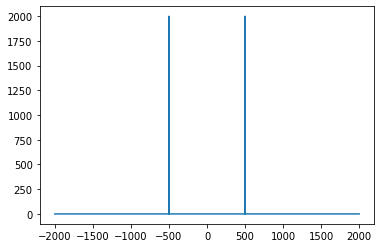

In [11]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

# Sampling
Here we'll be sampling the Discrete Time Signal.
This basically corresponds to reducing the sampling rate of the original Continuous Time Signal.

## Function for sampling

In [12]:
from dsptools import Wave

def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate) 

Select a factor by which to reduce the orignal sampling rate

In [13]:
factor = 3

In [14]:
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1  # For the anti-aliasing filter
print("Framerate:",framerate,"\nCutoff:", cutoff)

Framerate: 1333.3333333333333 
Cutoff: 665.6666666666666


If the computed cutoff is less than the frequency of the signal then aliasing will take place.

## Sampling without anti-aliasing

In [15]:
sampled = sample(wave, factor)
sampled.make_audio()

<source src="data:audio/wav;base64,UklGRmQfAABXQVZFZm10IBAAAAABAAEAoA8AAEAfAAACABAAZGF0YUAfAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAAAAAAACAWgAAAAABgAAAAACAWgAAAAAAAAAAAACApQAAAAD/fwAAAACApQAAAAAAA

### Spectrum of the sampled signal

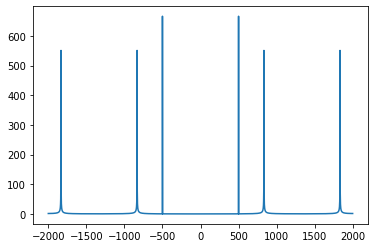

In [16]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

### Scaling the sampled signal

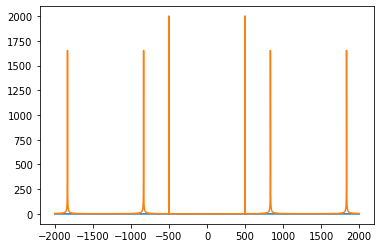

In [17]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

## Sampling with anti-aliasing
### Anti-Aliasing
Before sampling, we apply an anti-aliasing filter to remove frequencies above the new folding frequency, which is framerate/2

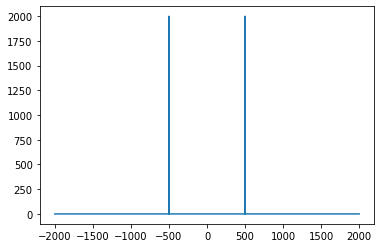

In [18]:
spectrum.low_pass(cutoff)
spectrum.plot()
anti_aliased = spectrum.make_wave()

### Sampling the antialiased signal

In [19]:
aa_sampled = sample(anti_aliased, factor)
aa_sampled.make_audio()

<source src="data:audio/wav;base64,UklGRmQfAABXQVZFZm10IBAAAAABAAEAoA8AAEAfAAACABAAZGF0YUAfAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD/fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAABgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD/fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAABgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD/fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAABgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAAAAAAACBWgAAAAACgAAAAACBWgAAAAAAAAAAAAB/pQAAAAD+fwAAAAB/pQAAAAAAA

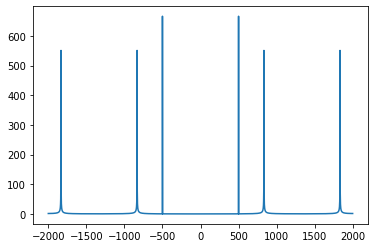

In [20]:
aa_sampled_spectrum = aa_sampled.make_spectrum(full=True)
aa_sampled_spectrum.plot()

# Sampling of a Real-World Signal
## Loading the audio file

<source src="data:audio/wav;base64,UklGRlQTCABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YTATCAAEAAAAzf87/6/+yv2w+YD3/wDyDLMPmwmM+7HwgfKb/64L6As8A+f5pPh//iUEzAFf+EnxGvNg+k8BIwVKB88G2QH/+6b50fpAA1YM3wjI+SvvRPCw+ucJfBREDyH8cvHU+cEJehF1Cnn6IO6D7sn7BxF3HRwRFPfc4yzdDeOF9c8LyxsDJAAk+BQW/6Pwbuvn8vkCXwUt9v3wTv0dBS8EawPnBrkLQg5BBEvvmuHN37Hn0ftFEVwTjwBy7rnqPPMzAg0FYPLL3kvjC/e3CBkRfxTZFsQVtwzO91nlA+Jy76QDFAm7+0H1eQVUFksUUABf74frRe2h8S383gSTAkv+xQI2Bej5Pu5S9tkMJh4CGZL+k+tp8HX/1ge3Akr5nvzGBl4I3vmm6QfnyvGbBbIZRh6jFAwMWQNd9d/x9wHyFu0i3hci/+3wFPVQAvQQXRuEH88gPh8+FAwGyf/U+lD3zQELFfYhSCR9H70Xqg46BmgF6gz7EeQOPwh5BOEETAWbBU4NkhtOJP0g7BebENgKJQvZEzQZMxdFFtwaLB3MFJcGAQSNE+0luizhKS0o1yLzE08QzB1xJA0ecxRrEboQtgqmBOIFvQzWDl4IS//c+n37Uv93BJ4FVP7688by3PkM+3D0oO+G7TXpJecT7H7xme+S593gGd302ZzbDuVE7vnqMdsj0S7Zt+hk76rqPubf4czW+dKJ3Y7n1uWC4tjore8s6/7fPdlS2DDaW9/K4/Xdps+4xunI6s2MzmfL/ssu0jDTlMoEwi7EJM0D1G7Uls3AxVnETsuT0lfRIst6zILV0Nis0j3MTsorygXOWtcT3J3Tbspc0a/fJ+Jl2tLWgdqr3lHiMOXl4uzedOMa7izyEe6r6kzuOPT09WT27fWi8qrx8PgtBJALNQsaArj6mf41CKMPVxTuFxIYxRCkCOsNsx0/KsAvOjAHLeAn6yAiH5goGjZkP39DSEKBPQ87zz07QEdBX0ZfTJlJST3ZNh9ANU2yUpJQhEnQRgVMW1X2Wl9WxksHRblGgEw3UDFQWFKLWOhbQFqVVWBOQUq0TJJPE1EJTgRFkz2rPtRF4UmCR2VCfULIRCJCKz1IP8ZHOkx7SGBBlTn+L/kqYTEYPGQ/4DaGLbExYzm/NZInVBedFQwimymYIckTsBNBG0Ed+RVEC5wGMgafAVz3Vu7s697w+/TW73Pl5eGZ5aflrd641OrMncoQz/nV3NNtxNy1KbJuscSusK6BruqorKYFq6CuL6/IqrmmcKG8nDCexqHUogWkxqySuSC84KwfnwiibKsZrjKna6IJqI2t07DysRSuI66SstuzsbLStfu8MMAmwOvCasox0mXQR8emxhrRntjb2EzZ1twk4sfll+b/44rid+TR5+HmO+GT4tvtJPm4/Oz7kf35/wX5pu+o8OD4avyP/hkFtAneB6YCwwW4ENsWlhDKB1EK5BBLD4sJXQdcC+IR0BpdIgggVxI8B+ELzBMjE4kQdBMAGusb5hWsCgkDfAVBD/IaBCBpF0gL/QxDFWgTBQlpBM8LJxJRDfMDiP9dATwGJAvRBLX0Xut49HMERgntABD7mv2j/nAAggT1BOD/ffsq+VP8wgYnEKsN+wEv+1L7nPtZ/kQERwf3BrMF4wMFAPX/6gUmCk8I9wbjCJkIf/9E9fH2UgN0D5sYOxvvD3wAEwC9CQ0MtgOO+lX6Yf58AqQJIhHgEwoOswXGA8cF8gVNBpsKhRCDEdcF7vLL7pP+yA07EqYNUgPa+U//HQz4DHIDqAC+BiwIhAEe+o/5mPxJ/xcEkwbCBPT+gPnE+Ej5yvWa8vj5TwCN+KDrCu3u/MEHRgNS+N7zfO4d5uDn+fES+Tf8OP4Z/Q753fXJ8ljtsukI7Qz3mf08+P3s9+1H+hr84+7h5g7yvwS8CwUAhPF885X+OgemCDgC+/n6+n0DFAd6BJsEYAufD1YLtAVJB+sPYxdEGw8dmxxfGcsVCxmtHzQgBRszGmcgOichKeQpfCplKqsq2yndJxIoCyy5MDs0mjOZLrgrdzD6OWpCD0c0ReU7hzTZONZBEEIDOoc06Da4Oas57zqdQJBFqUKmN9csRizMMh45LDrpNuc1DzbjNO80XTeXOiE6tTXvM/I4Bz6cOzM1jzCIL5wzcjjVN8YyKy6VLuwx+DKsLtkqpC8wOJM7sDlkN8E1XjQeM8cxji+aLQItHCvAJZchcCTRLKkyMDEuLMUneiSSI2cn7SoBKCcg2RqoGhcacBetE9wMMwfrCbgQJxTBEJ4HBwFDA/UIUQrWBz0ECwJiAsP9hO9E5J7q4/hEAS8B8flt8Bvpl+Yl5+voCOcu5DTkCuaV4rLY89JN1DfWhtdh2AjVys6Ryd7GS8QexBXIMs/u0VXMv8JivJO6OLzTvjW9YLi2tqa4arhptZq1xbkquwC6CrunvDy3mavSpZSp/LAbuNu6YbWaqKOhTarqtFu2ra5oqfqpM6ehomigE6M9p8WtobPKso+rM6JdnYWePKMGp2GmkaSnp7+qlqhopVGoaa69rt+n6aBuoKajlqWNpaCl5abOqPargbB0s7KvPqa9nlafdaX0rQO2KLiLs3KtI6oyrEKzwbsiv8m40KwEpj2pcLGKuk7BUsCouB+11boRwmvDG8DPvb6+ir9gv7LCNciHxmK+8LxSxxTTq9d01v3QusgOxFTKj9ax3AXbmddc16XZ89qe3ETifOtC88/yv+uy5r/nxu1f+NMAAQCl+1L7qPiH8x/3JAZSFTEbWBjVESsPzBIXGugfMyF1IToicyCLIVcpbTAGMRcxQTT/NCg05DdBPkVB7EGvQ6VBfjx+P0FLslITTx5JaEniTZ5TVFmFWwBYD1XpWLtdQl6gXqhhnmPIYy1mHWkvZ1pha129XW5iB2q1blVu/GvaaA5lg2N/ZBFlP2aFam1ug26ea55mzmGhX4hfimAfY51mumdiZJJeZlhMU0pTUVoQYaheiFb5UfNRclG7TxRO20wSTC1KMEh7SupOdkyPQUI5szqsPEo5MjgKPUdAdjt1MdIpLikiLaUyljfyNrAvWyg8JkQlyiFpISYlCCSBHSYcdB95HT4ZfxoTHDUWww6SEKUZzhwRFToNPg+jFIUX8RtVH3MbLxQMEcMO3gehAX0EDg5LFEwQ0we7ByEOqQ+cC/0GLQI4/Xr9ZAS7C6IOrgwdB8gAPv2D/DD8pfya/28CTwBp+XTyQPGs92gA+AMdAbb9fv21/n3/jwAqAP/6CPRY8r71D/dX9fz03Pbh92f3dfZM9Onx/fIR92D50fXC7r3sA/P++WD69fa99vT5JPgx8JTsO/Ku+eP6hvXE7o/sQfDx9jb8avvV9ETuxuvD7CfwTPNT89HwJu/c7+Xxp/OW9Ifz8++X7ezvEvS99fLzBfCJ7JTqbevy7w3z+/DK7C7rHO0n8Zb1nvZK8ivrAefb53Tq7uso6xHpcuc25dLgdt293hziuuPS5PnlfeRx4fHgNuMA45nf9tx62/LWX9Bxz8fV5dvX3Nfa0dc+0bPIb8chzwnWn9RYznXK88nKx9/DZcKTxA/Kl88Zz4rFErpPus/GitFR0sjJXL5ut/G42b4HwIu+wcI/zI3P5MjLvw6+XMAvvdG5Gbx5wk7Iasq8yMLE48EBw3DH78iJxrbEjcRExNXCtcJYxSTJe8pIyjbOmNTD1qbTFM3myVvOLdWs2OXW0NEN0LbUadf20yHUTdxx49HjH+G53b/bL91a4oXnmOiF55DokuvK6qnmXOca7m/zyPSC9Un32veo9Vn3WP/sBgwIOgQoAT8BhANYB2wLDw8HEpUTtRJWDpQKMgz5EXYVKRYrGM4cuh9DHj8dRiAAI2wjUiRlJfEidhvTFucbJCfrL1IznzMpM9wxoS70K

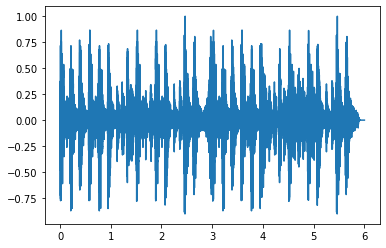

In [21]:
wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()
wave.make_audio()

## Spectrum of the Signal

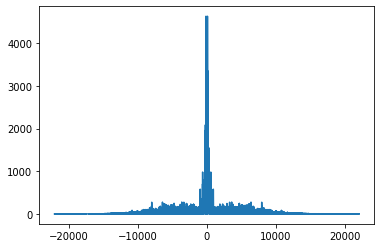

In [22]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

## Sampling

In [23]:
factor = 7

In [24]:
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1
print(framerate, cutoff)

6300.0 3149.0


### Sampling without anti-aliasing

<source src="data:audio/wav;base64,UklGRlQTCABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YTATCAAEAAAAAAAAAAAAAAAAAHD2AAAAAAAAAAAAAAAA0vAAAAAAAAAAAAAAAABP/gAAAAAAAAAAAAAAAHkBAAAAAAAAAAAAAAAAK/oAAAAAAAAAAAAAAAAG+gAAAAAAAAAAAAAAAPkKAAAAAAAAAAAAAAAAKBMAAAAAAAAAAAAAAAA19AAAAAAAAAAAAAAAALjuAAAAAAAAAAAAAAAA9/wAAAAAAAAAAAAAAADJBAAAAAAAAAAAAAAAAMgVAAAAAAAAAAAAAAAArPAAAAAAAAAAAAAAAAC0GQAAAAAAAAAAAAAAABkEAAAAAAAAAAAAAAAAWgAAAAAAAAAAAAAAAADmAgAAAAAAAAAAAAAAAHQOAAAAAAAAAAAAAAAA0AgAAAAAAAAAAAAAAADb5gAAAAAAAAAAAAAAAI0NAAAAAAAAAAAAAAAA2hoAAAAAAAAAAAAAAAB0IwAAAAAAAAAAAAAAADr2AAAAAAAAAAAAAAAAfxAAAAAAAAAAAAAAAAAIBQAAAAAAAAAAAAAAABwlAAAAAAAAAAAAAAAAGRoAAAAAAAAAAAAAAAD+FQAAAAAAAAAAAAAAAFgSAAAAAAAAAAAAAAAADQwAAAAAAAAAAAAAAAA3+gAAAAAAAAAAAAAAAB/xAAAAAAAAAAAAAAAACuQAAAAAAAAAAAAAAAAz1QAAAAAAAAAAAAAAAFTUAAAAAAAAAAAAAAAAWM0AAAAAAAAAAAAAAACS6AAAAAAAAAAAAAAAALTZAAAAAAAAAAAAAAAAf8UAAAAAAAAAAAAAAACEzgAAAAAAAAAAAAAAAILLAAAAAAAAAAAAAAAAmMMAAAAAAAAAAAAAAACIywAAAAAAAAAAAAAAAJzeAAAAAAAAAAAAAAAA0+sAAAAAAAAAAAAAAAD28AAAAAAAAAAAAAAAAA/6AAAAAAAAAAAAAAAA3hIAAAAAAAAAAAAAAACoMgAAAAAAAAAAAAAAAO5LAAAAAAAAAAAAAAAAKk8AAAAAAAAAAAAAAAAHXQAAAAAAAAAAAAAAACphAAAAAAAAAAAAAAAAolwAAAAAAAAAAAAAAABJVgAAAAAAAAAAAAAAAI5OAAAAAAAAAAAAAAAAz0QAAAAAAAAAAAAAAAD9NQAAAAAAAAAAAAAAAOc3AAAAAAAAAAAAAAAAzi4AAAAAAAAAAAAAAACtDAAAAAAAAAAAAAAAAPruAAAAAAAAAAAAAAAAgtoAAAAAAAAAAAAAAAD7vAAAAAAAAAAAAAAAAAieAAAAAAAAAAAAAAAAn5UAAAAAAAAAAAAAAADFsAAAAAAAAAAAAAAAABmcAAAAAAAAAAAAAAAA6KMAAAAAAAAAAAAAAAAruAAAAAAAAAAAAAAAAD7LAAAAAAAAAAAAAAAAauMAAAAAAAAAAAAAAADm3gAAAAAAAAAAAAAAACX4AAAAAAAAAAAAAAAA6goAAAAAAAAAAAAAAADDCAAAAAAAAAAAAAAAAB4UAAAAAAAAAAAAAAAARRYAAAAAAAAAAAAAAAABDAAAAAAAAAAAAAAAALEMAAAAAAAAAAAAAAAAbBQAAAAAAAAAAAAAAABrBQAAAAAAAAAAAAAAAHL6AAAAAAAAAAAAAAAA7foAAAAAAAAAAAAAAACV+gAAAAAAAAAAAAAAAGkGAAAAAAAAAAAAAAAA1gcAAAAAAAAAAAAAAABiEQAAAAAAAAAAAAAAAI8NAAAAAAAAAAAAAAAARhMAAAAAAAAAAAAAAAAWBwAAAAAAAAAAAAAAAGb+AAAAAAAAAAAAAAAAoQ0AAAAAAAAAAAAAAABi+QAAAAAAAAAAAAAAANP+AAAAAAAAAAAAAAAAWQAAAAAAAAAAAAAAAABc9wAAAAAAAAAAAAAAAL77AAAAAAAAAAAAAAAA6OYAAAAAAAAAAAAAAACQ+QAAAAAAAAAAAAAAAAYAAAAAAAAAAAAAAAAAO/kAAAAAAAAAAAAAAACSEQAAAAAAAAAAAAAAALEgAAAAAAAAAAAAAAAAZR4AAAAAAAAAAAAAAACxLwAAAAAAAAAAAAAAAMI6AAAAAAAAAAAAAAAA8E8AAAAAAAAAAAAAAABCQQAAAAAAAAAAAAAAAEJOAAAAAAAAAAAAAAAAcUEAAAAAAAAAAAAAAADpQQAAAAAAAAAAAAAAANk7AAAAAAAAAAAAAAAA8DMAAAAAAAAAAAAAAAA2PwAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAA/SgAAAAAAAAAAAAAAAAEKAAAAAAAAAAAAAAAAFodAAAAAAAAAAAAAAAAqxYAAAAAAAAAAAAAAADQCAAAAAAAAAAAAAAAAPLnAAAAAAAAAAAAAAAAauMAAAAAAAAAAAAAAADn3gAAAAAAAAAAAAAAAKrPAAAAAAAAAAAAAAAAGckAAAAAAAAAAAAAAACutgAAAAAAAAAAAAAAAE6sAAAAAAAAAAAAAAAADaEAAAAAAAAAAAAAAACvnQAAAAAAAAAAAAAAADqfAAAAAAAAAAAAAAAAFqoAAAAAAAAAAAAAAADnmwAAAAAAAAAAAAAAAFydAAAAAAAAAAAAAAAASZoAAAAAAAAAAAAAAADjqQAAAAAAAAAAAAAAAMWsAAAAAAAAAAAAAAAAOrMAAAAAAAAAAAAAAADcsQAAAAAAAAAAAAAAANm7AAAAAAAAAAAAAAAAPMEAAAAAAAAAAAAAAABD0QAAAAAAAAAAAAAAAGbWAAAAAAAAAAAAAAAA6+gAAAAAAAAAAAAAAABr9wAAAAAAAAAAAAAAAAP2AAAAAAAAAAAAAAAAJhUAAAAAAAAAAAAAAAC8JQAAAAAAAAAAAAAAAKw6AAAAAAAAAAAAAAAADUQAAAAAAAAAAAAAAACdVwAAAAAAAAAAAAAAAHJpAAAAAAAAAAAAAAAAQHYAAAAAAAAAAAAAAACKfAAAAAAAAAAAAAAAALJxAAAAAAAAAAAAAAAAB24AAAAAAAAAAAAAAADtcAAAAAAAAAAAAAAAAHxqAAAAAAAAAAAAAAAAdlYAAAAAAAAAAAAAAADBSQAAAAAAAAAAAAAAAE9IAAAAAAAAAAAAAAAAiT4AAAAAAAAAAAAAAACWJQAAAAAAAAAAAAAAAGYcAAAAAAAAAAAAAAAAaCAAAAAAAAAAAAAAAABAIwAAAAAAAAAAAAAAAA0FAAAAAAAAAAAAAAAAnhEAAAAAAAAAAAAAAAAyDQAAAAAAAAAAAAAAALb7AAAAAAAAAAAAAAAAaO8AAAAAAAAAAAAAAACM/gAAAAAAAAAAAAAAAHb0AAAAAAAAAAAAAAAARPUAAAAAAAAAAAAAAACb7AAAAAAAAAAAAAAAADL5AAAAAAAAAAAAAAAAN/QAAAAAAAAAAAAAAABw8wAAAAAAAAAAAAAAAOvuAAAAAAAAAAAAAAAA8u0AAAAAAAAAAAAAAAAb6gAAAAAAAAAAAAAAAJToAAAAAAAAAAAAAAAA4eMAAAAAAAAAAAAAAADd4QAAAAAAAAAAAAAAALjiAAAAAAAAAAAAAAAAldgAAAAAAAAAAAAAAABy2AAAAAAAAAAAAAAAAMvQAAAAAAAAAAAAAAAAsroAAAAAAAAAAAAAAACasQAAAAAAAAAAAAAAABCwAAAAAAAAAAAAAAAAAMIAAAAAAAAAAAAAAADJugAAAAAAAAAAAAAAAF/AAAAAAAAAAAAAAAAADLsAAAAAAAAAAAAAAACc0QAAAAAAAAAAAAAAAMLRAAAAAAAAAAAAAAAA19cAAAAAAAAAAAAAAACl3gAAAAAAAAAAAAAAAH7jAAAAAAAAAAAAAAAA1fYAAAAAAAAAAAAAAABNAQAAAAAAAAAAAAAAAAgWAAAAAAAAAAAAAAAA7hgAAAAAAAAAAAAAAABfJwAAAAAAAAAAAAAAAGMfAAAAAAAAAAAAAAAAdDQAA

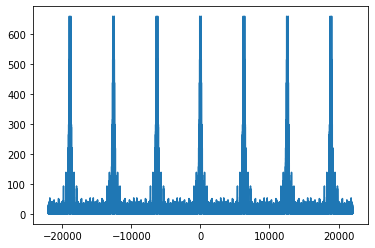

In [25]:
sampled = sample(wave, factor)
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()
sampled.make_audio()

### Anti-Aliased Signal

<source src="data:audio/wav;base64,UklGRlQTCABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YTATCAC9/r7+4P4f/3H/y/8jAHUAuQDwABsBPAFTAWABXQFCAQcBoQAMAEn/YP5i/Wr8lfsE+9D6C/u4+8n8Iv6Y//oAFwLEAucCewKPAUwA6f6l/b/8avzD/Mv9aP9hAW4DPQV/BvgGhAYmBQADVwCH/fL6+Pjm9+j3Bvkg+/H9HQE7BOUGxwipCXkJSghPBtYDOAHP/uL8pfss+2z7Pvxr/a3+wv9xAJcAIQAY/5T9vvvF+dv3KvbU9PDziPOd8yj0G/Vm9vf3uvmY+3n9Qf/TABUC7wJPAy4DkwKTAU8A8f6l/ZX84vuc+8H7O/zn/JT9Fv5E/gj+Y/1t/FP7Ufqo+ZL5Nfqb+6/9OgDrAmMFQQc1CAwIugZeBEIB0f2C+tH3I/a99bP27Pgd/N3/rgMYB7UJRAuxCxkLwAkKCGQGNQXMBFIFxQb4CJ0LUg60EG4SSxM8E10S7RBFD8YNxgyGDCANgw55EKwStxQ2FtsWdxYLFcAS6g/2DFoKhAjGB0wIDgrZDFMQBhR4Fzsa/RuUHAcchxprGCEWGxS/ElgSChPRFH0XwRo5HnwhKST1JbImVCbvJLIi2h+tHGwZTBZyE+0QvA7PDA8LZgm+BwwGTQSGAsQAE/99/Qb8rPph+RX4sfYh9VbzSPH97oTs9uly5xrlDONe4R7gS9/a3rXew97k3gDfAt/h3p3eQN7c3YfdV91f3afdMd7w3s/fr+Bs4eLh7+F54XLg1t6w3BnaMNce1A3RKM6Qy2PJr8d5xrvFZcVfxZDF3MUvxnbGqMbDxs7G0sbdxvvGN8eWxxjItMhhyRDKtMpCy7TLDMxUzJrM88xyzSzOLs9/0BzS+tMG1irYTdpb3EXeBOCc4RbjhuQA5pfnWulQ63jtxu8p8oz01/b6+Ov6q/xE/sv/WAEJA/UELge5CZAMpA/ZEhQWNxktHOoebiHHIwwmWSjMKnstcjCuMxw3nToGPixB5kMXRrJHvkhTSZpJxUkHSoxKckvGTHxOd1CNUotUQFaHV0xYj1hnWP5XhVcyVzNXo1eKWNNZVVvVXA9ewl68XuFdMVzHWdpWtFOkUPVN5UuVSg5KN0riSs5Ls0xQTXJN/EzqS1BKV0gvRgtEE0JiQPw+0z3GPKw7WjqtOJI2BTQaMfEttSqRJ6ckCyK7H54djBtPGbIWiBO1DzcLJAauABf7pfWg8Dvsleiq5VvjbuGZ343dA9vH18LT/M6aydvDCr51uGCz+q5cq4GoTKaRpB+jx6FooPSedJ0CnMWa6ZmTmdmZupoenNmdsJ9goa2ibaOLow+jHKLpoLyf3Z6JnuueFKD6oX2kaqeIqp+thrAns4C1pre7uem7Vr4ewUnEycd9yzfPwdLo1YrYldoS3CDd79263rzfI+EK43TlSuhh64HubvH18/T1YvdO+OH4Ufnd+b76HPwL/n8AWANgBlUJ9wsSDogPUhCHEFQQ9Q+oD6UPEhD9EFcS/RO1FUMXaxgBGe4YNxj6FmwVyxNZEk4RzRDkEIQRiBK6E9wUtBUSFtsVCRWrE+ER2A+6Da4LzwkpCLcGagUsBOkClAErAL3+Yf06/Gz7FvtL+wr8QP3J/nIABAJLAxwEYgQeBGcDaAJWAWoA1/+7/yIABAE9Ap4D7QT4BZQGrgZJBoAFgASDA8MCdAK0AowD6gSmBoQIQQqcC2IMdgzTC5IK4ggGB0QF4AMQA/ICiwPDBG0GSggVCowLewzDDFsMVgvYCRcITwa5BIMDywKcAuwCnwOOBIwFbQYMB1EHMwe3Bu0F8ATdA88C2wEOAWoA6f97/xD/lP77/T39WvxZ+0n6O/lC+G33xvZQ9gb23fXI9bT1lfVg9RP1r/Q/9NHzdPM08xnzJfNR843zyfPu8+vztvNL87XyCfJj8ebwtvDv8KPx1/J99Hv2qvjZ+tz8iv7I/4sA3gDcAK8AiACbABQBEAKdA7MFOggHC+0NuhBFE3AVMheQGKAZhhpoG2scqx03Hw4hHSNIJWsnXykHK1EsOy3SLTQuiS76LrEvyjBVMlA0pjY2OdQ7UT6DQEdCjENMRJNEeUQdRJ5DGkOnQlBCFkLuQctBmEFGQcpAIEBNP2A+bD2HPMk7QzsBOwc7UTvTO3s8NT3rPYc++T4zPyo/2z5HPnI9Zzw0O+w5pTh4N3420DWBNZw1JDYMNz44lTnoOgY8wTzzPIU8cTvEOZ83NDW8MnYwmC5MLacspywxLRYuGS/1L2cwOTBIL4Yt/yrUJzskbyCxHDoZNha+E9gRdxB+D8YOIw5tDYIMSwvBCeUHxgV6AxkBv/5+/Gb6gPjN9kj15/Oc8ljxDPCp7iTtcuuN6XDnHuWZ4uzfI91O2oDXzdRH0vzP9s03zLvKdclSyD7HI8brxInD9MEtwD6+N7wsujS4ZbbOtHuzb7KksRGxpbBOsPuvna8pr5mu7K0krUesXatsqnupj6irp9GmAqY/pYik3aM9o6miH6KdoR6hoKAfoJafBp9vntedQ529nE6cAJzXm9eb/ZtBnJec85xGnYOdpJ2knYedVZ0aneScwJy3nNCcCJ1anb6dJ56MnueeNp+An82fLKCroFWhMaI9o2+ktaX4piCoFqnLqTuqaqptql6qX6qQqg6r6qsnrbqui7B3sle0BrZnt2m4DrlluY25rbnwuXq6Z7vCvIa+m8DfwijFS8coyanKzcuizEvN8s3HzvjPp9Hl06/W7tl83Sfht+T959TqKe387mTwh/GW8sfzSfVB98P50fxYADkERghRDC0QtxPaFo8Z4BvmHb4fjSF0I40l5yeIKmYtcTCQM6g2oTlmPOo+K0EtQ/1Eq0ZLSO1JoktxTWFPblGSU8VV/VcuWlNcZF5eYEJiEGTIZWtn+GhsasJr9mwDbuVunW8tcJpw7nA0cXdxwXEbcohyB3ORcxp0l3T2dCt1K3XxdHx00nP9cgtyCnEIcA5vIG4+bWBsfmuMan1pSmjwZnBl1GMoYnxg315cXfxbvVqYWX9YYFcmVsFUIVNEUStP4kx9ShRIvUWPQ5hB4T9mPh49+DvgOsQ5kTg/N8o1NDSIMtEwGy9vLdIrQiq6KC4nlCXkIxwiQCBcHoYc1hpnGU4YnBdTF2sXzxdgGPgYcBmmGYAZ8Rj6F6oWGxVrE7wRLBDQDrQN2AwzDLULTQvoCnsK/glzCeEIUAjKB1QH7AaMBiIGnAXmBPEDtQI2AYj/xP0T/J36ifn0+Ov4bPlg+qH7/fw8/i3/pf+O/+D+rf0U/EL6aPi19k/1TvS384PzmvPe8y70bvSJ9Hf0O/Tj84PzMfMB8/7yLPOC8/DzYvS/9Pb0+fTG9GT04vNT883yY/Ie8gLyBvId8jPyMvIL8rPxLfGD8MjvFu+H7jPuJ+5m7ufule9T8P/wefGp8X7x+vAn8CDvBe787Cfsoet667LrPewB7dztp+4673fvRO+a7nnt8ese6h/oGuYz5IjiMeE74Kjfcd+E38bfGeBe4HfgSeDG3+Tept0c3FrafNii1unUZ9Mt0j3RkNAU0K7PQM+uzuHNysxqy8vJBsg6xorEFsP3wTrB3MDPwPbAMMFXwU3B/MBdwHa/Xr40vRq8M7uYule6bLrIuk673LtQvI+8ibw/vMC7KLuaujy6K7p3uiO7HbxGvXO+eb8xwIPAacDxvz6/gL7vvcG9Hb4av7bA1sJKxdXHN8o2zKbNdM6nzl3Oys0szcPMxcxXzYfOStB90vDUate12ajbKt043uTeUd+s3yLg3ODy4W/jSeVp56/p+Osl7iLw6vGG8wv1l/ZF+C36WvzI/mIBCgSXBuMIzApCDEMN4g1EDpYOCw/QDwQRthLdFF0XCxqwHBkfFyGQInwj6yP9I+Uj2SMNJKokxSVhJ2kpuSsfLmcwYDLnM+g0ZDVuN

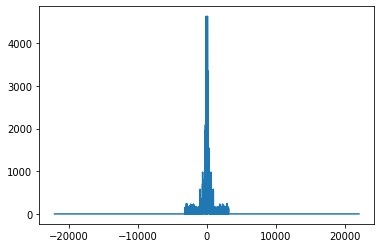

In [26]:
spectrum.low_pass(cutoff)
spectrum.plot()
filtered = spectrum.make_wave()
filtered.make_audio()

### Sampling the anti-aliased signal

<source src="data:audio/wav;base64,UklGRlQTCABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YTATCAC7/gAAAAAAAAAAAAAAAHUAAAAAAAAAAAAAAAAAXwEAAAAAAAAAAAAAAABe/QAAAAAAAAAAAAAAAMT8AAAAAAAAAAAAAAAAfgIAAAAAAAAAAAAAAAC//AAAAAAAAAAAAAAAAAEHAAAAAAAAAAAAAAAA7vgAAAAAAAAAAAAAAABBBAAAAAAAAAAAAAAAANsDAAAAAAAAAAAAAAAAOfwAAAAAAAAAAAAAAAAX/wAAAAAAAAAAAAAAAN/zAAAAAAAAAAAAAAAAsfkAAAAAAAAAAAAAAABTAwAAAAAAAAAAAAAAAJD8AAAAAAAAAAAAAAAAE/4AAAAAAAAAAAAAAACf+QAAAAAAAAAAAAAAAGoFAAAAAAAAAAAAAAAAzv0AAAAAAAAAAAAAAAAY/AAAAAAAAAAAAAAAACgLAAAAAAAAAAAAAAAAzgYAAAAAAAAAAAAAAABXEwAAAAAAAAAAAAAAADINAAAAAAAAAAAAAAAAlxYAAAAAAAAAAAAAAADRBwAAAAAAAAAAAAAAAGAaAAAAAAAAAAAAAAAANxQAAAAAAAAAAAAAAABjHgAAAAAAAAAAAAAAAOIiAAAAAAAAAAAAAAAA0A4AAAAAAAAAAAAAAACKAgAAAAAAAAAAAAAAAAr4AAAAAAAAAAAAAAAA1+kAAAAAAAAAAAAAAACs3gAAAAAAAAAAAAAAAG7eAAAAAAAAAAAAAAAAAt4AAAAAAAAAAAAAAABP4QAAAAAAAAAAAAAAAMzQAAAAAAAAAAAAAAAAE8UAAAAAAAAAAAAAAAB0xgAAAAAAAAAAAAAAAMrHAAAAAAAAAAAAAAAAxMsAAAAAAAAAAAAAAAA90AAAAAAAAAAAAAAAABbeAAAAAAAAAAAAAAAAOukAAAAAAAAAAAAAAADw+AAAAAAAAAAAAAAAAPwEAAAAAAAAAAAAAAAAWhkAAAAAAAAAAAAAAAAHKwAAAAAAAAAAAAAAAIdBAAAAAAAAAAAAAAAALEoAAAAAAAAAAAAAAAAAUwAAAAAAAAAAAAAAAHhYAAAAAAAAAAAAAAAA1FsAAAAAAAAAAAAAAABEWgAAAAAAAAAAAAAAAHVKAAAAAAAAAAAAAAAAZ00AAAAAAAAAAAAAAAC8QAAAAAAAAAAAAAAAAN02AAAAAAAAAAAAAAAAOyIAAAAAAAAAAAAAAADLDwAAAAAAAAAAAAAAACDsAAAAAAAAAAAAAAAAz9oAAAAAAAAAAAAAAAARuAAAAAAAAAAAAAAAAJ6iAAAAAAAAAAAAAAAAW5kAAAAAAAAAAAAAAADcoAAAAAAAAAAAAAAAADafAAAAAAAAAAAAAAAA76YAAAAAAAAAAAAAAABZuQAAAAAAAAAAAAAAAPPOAAAAAAAAAAAAAAAAv90AAAAAAAAAAAAAAABF6wAAAAAAAAAAAAAAANf4AAAAAAAAAAAAAAAAXQMAAAAAAAAAAAAAAACeEAAAAAAAAAAAAAAAAHESAAAAAAAAAAAAAAAAWBgAAAAAAAAAAAAAAAD7EAAAAAAAAAAAAAAAAPoVAAAAAAAAAAAAAAAA3QkAAAAAAAAAAAAAAAAsAAAAAAAAAAAAAAAAAAT8AAAAAAAAAAAAAAAAaAQAAAAAAAAAAAAAAAC6/wAAAAAAAAAAAAAAAJ0GAAAAAAAAAAAAAAAAdwIAAAAAAAAAAAAAAACsCwAAAAAAAAAAAAAAAEsFAAAAAAAAAAAAAAAAVggAAAAAAAAAAAAAAADmCQAAAAAAAAAAAAAAAPACAAAAAAAAAAAAAAAAPQcAAAAAAAAAAAAAAAAQAQAAAAAAAAAAAAAAADn9AAAAAAAAAAAAAAAAufYAAAAAAAAAAAAAAABS9QAAAAAAAAAAAAAAAAfzAAAAAAAAAAAAAAAApfMAAAAAAAAAAAAAAADa8AAAAAAAAAAAAAAAANj8AAAAAAAAAAAAAAAAiQAAAAAAAAAAAAAAAAAXCwAAAAAAAAAAAAAAAMQZAAAAAAAAAAAAAAAATiMAAAAAAAAAAAAAAAASLgAAAAAAAAAAAAAAAJg0AAAAAAAAAAAAAAAA6kMAAAAAAAAAAAAAAAAEQwAAAAAAAAAAAAAAACRBAAAAAAAAAAAAAAAAlTsAAAAAAAAAAAAAAABBPgAAAAAAAAAAAAAAAMg9AAAAAAAAAAAAAAAAGzYAAAAAAAAAAAAAAAA6OwAAAAAAAAAAAAAAAOw3AAAAAAAAAAAAAAAA5SwAAAAAAAAAAAAAAACKLwAAAAAAAAAAAAAAAF0ZAAAAAAAAAAAAAAAANw4AAAAAAAAAAAAAAAB+AwAAAAAAAAAAAAAAADn1AAAAAAAAAAAAAAAAVesAAAAAAAAAAAAAAAAZ2gAAAAAAAAAAAAAAAHHKAAAAAAAAAAAAAAAAnsEAAAAAAAAAAAAAAABmtAAAAAAAAAAAAAAAAIyvAAAAAAAAAAAAAAAA56oAAAAAAAAAAAAAAADBpAAAAAAAAAAAAAAAAJqgAAAAAAAAAAAAAAAAupwAAAAAAAAAAAAAAAC2mwAAAAAAAAAAAAAAAP6cAAAAAAAAAAAAAAAAfpwAAAAAAAAAAAAAAAD6ngAAAAAAAAAAAAAAAPCjAAAAAAAAAAAAAAAA86kAAAAAAAAAAAAAAAC0rAAAAAAAAAAAAAAAAAa4AAAAAAAAAAAAAAAACLsAAAAAAAAAAAAAAADcyAAAAAAAAAAAAAAAALbPAAAAAAAAAAAAAAAAkeQAAAAAAAAAAAAAAACE8gAAAAAAAAAAAAAAAD8EAAAAAAAAAAAAAAAABxwAAAAAAAAAAAAAAADDKgAAAAAAAAAAAAAAAEI/AAAAAAAAAAAAAAAAC0wAAAAAAAAAAAAAAACsWgAAAAAAAAAAAAAAAPtnAAAAAAAAAAAAAAAAOHAAAAAAAAAAAAAAAAC6cgAAAAAAAAAAAAAAAM51AAAAAAAAAAAAAAAAp3EAAAAAAAAAAAAAAAAgawAAAAAAAAAAAAAAAAJhAAAAAAAAAAAAAAAA2VcAAAAAAAAAAAAAAADlSgAAAAAAAAAAAAAAAHM9AAAAAAAAAAAAAAAAfTQAAAAAAAAAAAAAAADyKAAAAAAAAAAAAAAAAK4cAAAAAAAAAAAAAAAA8BcAAAAAAAAAAAAAAAAbGAAAAAAAAAAAAAAAAMcNAAAAAAAAAAAAAAAADAoAAAAAAAAAAAAAAACVBgAAAAAAAAAAAAAAAIf/AAAAAAAAAAAAAAAAY/kAAAAAAAAAAAAAAACN/wAAAAAAAAAAAAAAAED1AAAAAAAAAAAAAAAAXvQAAAAAAAAAAAAAAADv8gAAAAAAAAAAAAAAAOb0AAAAAAAAAAAAAAAAUPIAAAAAAAAAAAAAAAD38QAAAAAAAAAAAAAAABruAAAAAAAAAAAAAAAAZfEAAAAAAAAAAAAAAADi7AAAAAAAAAAAAAAAAMPtAAAAAAAAAAAAAAAA1esAAAAAAAAAAAAAAAAO4AAAAAAAAAAAAAAAAEvgAAAAAAAAAAAAAAAARdgAAAAAAAAAAAAAAADRzwAAAAAAAAAAAAAAAIDJAAAAAAAAAAAAAAAAhMAAAAAAAAAAAAAAAAAEwAAAAAAAAAAAAAAAAPa5AAAAAAAAAAAAAAAAK7wAAAAAAAAAAAAAAAAXugAAAAAAAAAAAAAAACvAAAAAAAAAAAAAAAAAwr0AAAAAAAAAAAAAAADuywAAAAAAAAAAAAAAAHvMAAAAAAAAAAAAAAAAMdcAAAAAAAAAAAAAAAB/3wAAAAAAAAAAAAAAAJDpAAAAAAAAAAAAAAAAifYAAAAAAAAAAAAAAACgBgAAAAAAAAAAAAAAAKoOAAAAAAAAAAAAAAAALxoAAAAAAAAAAAAAAAAvJAAAAAAAAAAAAAAAAKMpAAAAAAAAAAAAAAAArjUAA

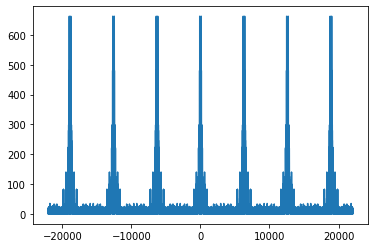

In [27]:
aa_sampled = sample(filtered, factor)
aa_sampled_spectrum = aa_sampled.make_spectrum(full=True)
aa_sampled_spectrum.plot()
aa_sampled.make_audio()

## Retrieving The Original Signal
Getting rid of the spectral copies and re-scaling the signal

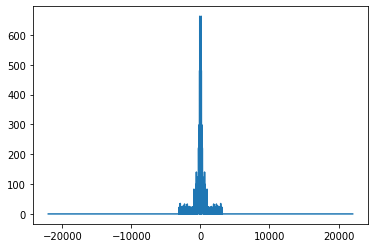

In [28]:
aa_sampled_spectrum.low_pass(cutoff)
aa_sampled_spectrum.plot()

Rescaling the sampled signal

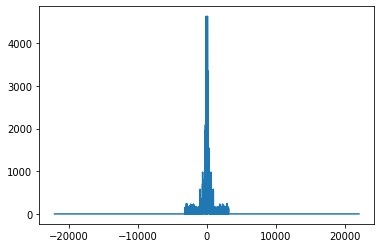

In [29]:
aa_sampled_spectrum.scale(factor)
aa_sampled_spectrum.plot()

Anti-aliased spectrum

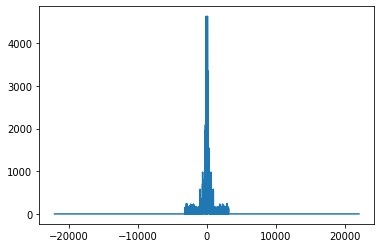

In [30]:
spectrum.plot()

## Checking the differences 
### Original spectrum -vs- Interpolated spectrum

In [31]:
spectrum.max_diff(aa_sampled_spectrum)

1.016845989170083e-12

### Converting the Low-Pass Filtered spectrum to the interpolated signal

In [32]:
interpolated = aa_sampled_spectrum.make_wave()
interpolated.make_audio()

<source src="data:audio/wav;base64,UklGRlQTCABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YTATCAC9/r7+4P4f/3H/y/8jAHUAuQDwABsBPAFTAWABXQFCAQcBoQAMAEn/YP5i/Wr8lfsE+9D6C/u4+8n8Iv6Y//oAFwLEAucCewKPAUwA6f6l/b/8avzD/Mv9aP9hAW4DPQV/BvgGhAYmBQADVwCH/fL6+Pjm9+j3Bvkg+/H9HQE7BOUGxwipCXkJSghPBtYDOAHP/uL8pfss+2z7Pvxr/a3+wv9xAJcAIQAY/5T9vvvF+dv3KvbU9PDziPOd8yj0G/Vm9vf3uvmY+3n9Qf/TABUC7wJPAy4DkwKTAU8A8f6l/ZX84vuc+8H7O/zn/JT9Fv5E/gj+Y/1t/FP7Ufqo+ZL5Nfqb+6/9OgDrAmMFQQc1CAwIugZeBEIB0f2C+tH3I/a99bP27Pgd/N3/rgMYB7UJRAuxCxkLwAkKCGQGNQXMBFIFxQb4CJ0LUg60EG4SSxM8E10S7RBFD8YNxgyGDCANgw55EKwStxQ2FtsWdxYLFcAS6g/2DFoKhAjGB0wIDgrZDFMQBhR4Fzsa/RuUHAcchxprGCEWGxS/ElgSChPRFH0XwRo5HnwhKST1JbImVCbvJLIi2h+tHGwZTBZyE+0QvA7PDA8LZgm+BwwGTQSGAsQAE/99/Qb8rPph+RX4sfYh9VbzSPH97oTs9uly5xrlDONe4R7gS9/a3rXew97k3gDfAt/h3p3eQN7c3YfdV91f3afdMd7w3s/fr+Bs4eLh7+F54XLg1t6w3BnaMNce1A3RKM6Qy2PJr8d5xrvFZcVfxZDF3MUvxnbGqMbDxs7G0sbdxvvGN8eWxxjItMhhyRDKtMpCy7TLDMxUzJrM88xyzSzOLs9/0BzS+tMG1irYTdpb3EXeBOCc4RbjhuQA5pfnWulQ63jtxu8p8oz01/b6+Ov6q/xE/sv/WAEJA/UELge5CZAMpA/ZEhQWNxktHOoebiHHIwwmWSjMKnstcjCuMxw3nToGPixB5kMXRrJHvkhTSZpJxUkHSoxKckvGTHxOd1CNUotUQFaHV0xYj1hnWP5XhVcyVzNXo1eKWNNZVVvVXA9ewl68XuFdMVzHWdpWtFOkUPVN5UuVSg5KN0riSs5Ls0xQTXJN/EzqS1BKV0gvRgtEE0JiQPw+0z3GPKw7WjqtOJI2BTQaMfEttSqRJ6ckCyK7H54djBtPGbIWiBO1DzcLJAauABf7pfWg8Dvsleiq5VvjbuGZ343dA9vH18LT/M6aydvDCr51uGCz+q5cq4GoTKaRpB+jx6FooPSedJ0CnMWa6ZmTmdmZupoenNmdsJ9goa2ibaOLow+jHKLpoLyf3Z6JnuueFKD6oX2kaqeIqp+thrAns4C1pre7uem7Vr4ewUnEycd9yzfPwdLo1YrYldoS3CDd79263rzfI+EK43TlSuhh64HubvH18/T1YvdO+OH4Ufnd+b76HPwL/n8AWANgBlUJ9wsSDogPUhCHEFQQ9Q+oD6UPEhD9EFcS/RO1FUMXaxgBGe4YNxj6FmwVyxNZEk4RzRDkEIQRiBK6E9wUtBUSFtsVCRWrE+ER2A+6Da4LzwkpCLcGagUsBOkClAErAL3+Yf06/Gz7FvtL+wr8QP3J/nIABAJLAxwEYgQeBGcDaAJWAWoA1/+7/yIABAE9Ap4D7QT4BZQGrgZJBoAFgASDA8MCdAK0AowD6gSmBoQIQQqcC2IMdgzTC5IK4ggGB0QF4AMQA/ICiwPDBG0GSggVCowLewzDDFsMVgvYCRcITwa5BIMDywKcAuwCnwOOBIwFbQYMB1EHMwe3Bu0F8ATdA88C2wEOAWoA6f97/xD/lP77/T39WvxZ+0n6O/lC+G33xvZQ9gb23fXI9bT1lfVg9RP1r/Q/9NHzdPM08xnzJfNR843zyfPu8+vztvNL87XyCfJj8ebwtvDv8KPx1/J99Hv2qvjZ+tz8iv7I/4sA3gDcAK8AiACbABQBEAKdA7MFOggHC+0NuhBFE3AVMheQGKAZhhpoG2scqx03Hw4hHSNIJWsnXykHK1EsOy3SLTQuiS76LrEvyjBVMlA0pjY2OdQ7UT6DQEdCjENMRJNEeUQdRJ5DGkOnQlBCFkLuQctBmEFGQcpAIEBNP2A+bD2HPMk7QzsBOwc7UTvTO3s8NT3rPYc++T4zPyo/2z5HPnI9Zzw0O+w5pTh4N3420DWBNZw1JDYMNz44lTnoOgY8wTzzPIU8cTvEOZ83NDW8MnYwmC5MLacspywxLRYuGS/1L2cwOTBIL4Yt/yrUJzskbyCxHDoZNha+E9gRdxB+D8YOIw5tDYIMSwvBCeUHxgV6AxkBv/5+/Gb6gPjN9kj15/Oc8ljxDPCp7iTtcuuN6XDnHuWZ4uzfI91O2oDXzdRH0vzP9s03zLvKdclSyD7HI8brxInD9MEtwD6+N7wsujS4ZbbOtHuzb7KksRGxpbBOsPuvna8pr5mu7K0krUesXatsqnupj6irp9GmAqY/pYik3aM9o6miH6KdoR6hoKAfoJafBp9vntedQ529nE6cAJzXm9eb/ZtBnJec85xGnYOdpJ2knYedVZ0aneScwJy3nNCcCJ1anb6dJ56MnueeNp+An82fLKCroFWhMaI9o2+ktaX4piCoFqnLqTuqaqptql6qX6qQqg6r6qsnrbqui7B3sle0BrZnt2m4DrlluY25rbnwuXq6Z7vCvIa+m8DfwijFS8coyanKzcuizEvN8s3HzvjPp9Hl06/W7tl83Sfht+T959TqKe387mTwh/GW8sfzSfVB98P50fxYADkERghRDC0QtxPaFo8Z4BvmHb4fjSF0I40l5yeIKmYtcTCQM6g2oTlmPOo+K0EtQ/1Eq0ZLSO1JoktxTWFPblGSU8VV/VcuWlNcZF5eYEJiEGTIZWtn+GhsasJr9mwDbuVunW8tcJpw7nA0cXdxwXEbcohyB3ORcxp0l3T2dCt1K3XxdHx00nP9cgtyCnEIcA5vIG4+bWBsfmuMan1pSmjwZnBl1GMoYnxg315cXfxbvVqYWX9YYFcmVsFUIVNEUStP4kx9ShRIvUWPQ5hB4T9mPh49+DvgOsQ5kTg/N8o1NDSIMtEwGy9vLdIrQiq6KC4nlCXkIxwiQCBcHoYc1hpnGU4YnBdTF2sXzxdgGPgYcBmmGYAZ8Rj6F6oWGxVrE7wRLBDQDrQN2AwzDLULTQvoCnsK/glzCeEIUAjKB1QH7AaMBiIGnAXmBPEDtQI2AYj/xP0T/J36ifn0+Ov4bPlg+qH7/fw8/i3/pf+O/+D+rf0U/EL6aPi19k/1TvS384PzmvPe8y70bvSJ9Hf0O/Tj84PzMfMB8/7yLPOC8/DzYvS/9Pb0+fTG9GT04vNT883yY/Ie8gLyBvId8jPyMvIL8rPxLfGD8MjvFu+H7jPuJ+5m7ufule9T8P/wefGp8X7x+vAn8CDvBe787Cfsoet667LrPewB7dztp+4673fvRO+a7nnt8ese6h/oGuYz5IjiMeE74Kjfcd+E38bfGeBe4HfgSeDG3+Tept0c3FrafNii1unUZ9Mt0j3RkNAU0K7PQM+uzuHNysxqy8vJBsg6xorEFsP3wTrB3MDPwPbAMMFXwU3B/MBdwHa/Xr40vRq8M7uYule6bLrIuk673LtQvI+8ibw/vMC7KLuaujy6K7p3uiO7HbxGvXO+eb8xwIPAacDxvz6/gL7vvcG9Hb4av7bA1sJKxdXHN8o2zKbNdM6nzl3Oys0szcPMxcxXzYfOStB90vDUate12ajbKt043uTeUd+s3yLg3ODy4W/jSeVp56/p+Osl7iLw6vGG8wv1l/ZF+C36WvzI/mIBCgSXBuMIzApCDEMN4g1EDpYOCw/QDwQRthLdFF0XCxqwHBkfFyGQInwj6yP9I+Uj2SMNJKokxSVhJ2kpuSsfLmcwYDLnM+g0ZDVuN

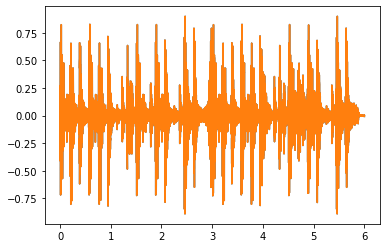

In [33]:
filtered.plot()
interpolated.plot()

## Anti-aliased signal -vs- Interpolated signal

In [34]:
filtered.max_diff(interpolated)

6.717223303693417e-16